# MACD - Moving average convergence/divergence

##How it works?

MACD is based on EMA (Exponential moving average). MACD is composed of 2 plots: MACD and MACD Signal.

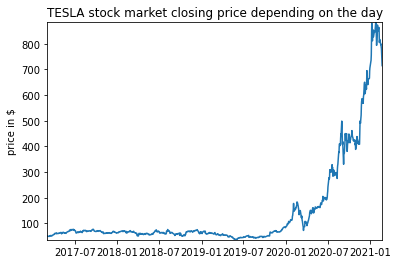

In [81]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

stock_data = pd.read_csv('tesla-stock.csv')
stock_data.columns = ['date', 'close', 'volume', 'open', 'high', 'low']
columns_to_mod = ['close', 'open', 'high', 'low']

for column in columns_to_mod:
    stock_data[column] = stock_data[column].astype(str)
    stock_data[column] = stock_data[column].str.replace('$', '').astype(float)

stock_data['date'] = pd.to_datetime(stock_data['date'])

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(stock_data['date'], stock_data['close'], ax, 'TESLA stock market closing price depending on the day', 'price in $')

##EMA Formula:

![](https://i.imgur.com/yhqFwNo.png)

In [103]:
def EMA(period, day, array=None):
    alfa = 2/(period+1)
    numerator = 0
    denominator = 0
    for i in range(period):
        if array is None:
            numerator += pow(1-alfa, i)*stock_data.loc[day + i, 'close']
        else:
            numerator += pow(1-alfa, i)*array[day + i]
        denominator += pow(1-alfa, i)
    return numerator/denominator


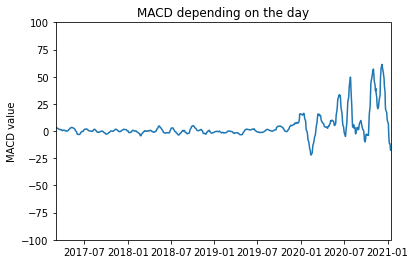

In [104]:
fig, ax2 = plt.subplots()
ax2.set_ylim([-100,100])
MACD = []
fixed_dates = stock_data['date'][26:]
for i in range(1, 975):
        MACD.append(EMA(12, i) - EMA(26, i))
plot(fixed_dates, MACD, ax2, 'MACD depending on the day', 'MACD value')

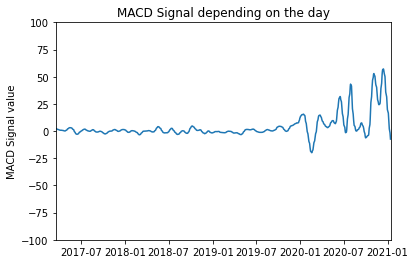

In [112]:
fig, ax3 = plt.subplots()
ax3.set_ylim([-100,100])
fixed_dates = fixed_dates[:965]
MACD_signal = []
for i in range(1, 966):
    MACD_signal.append(EMA(9, i, MACD))
plot(fixed_dates, MACD_signal, ax3, 'MACD Signal depending on the day', 'MACD Signal value')